### Задание 2

- Проанализировать продажи в разрезе брендов за прошлую и позапрошлую недели, написать короткую аналитическую запасику об изменения и их причинах по выручке и маржинальности.
- Как изменилась маржинальность продаж в целом и какие основные факторы на это повлияли, какое действие может дать "быстрый" результат?		

In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [149]:
df = pd.read_excel('sourse.xlsx', sheet_name='Данные для задачи 2')

In [151]:
#для удобства выручку будем отображать в млн.руб., а маржинальность в процентах
df['revenue']= df.apply(lambda x: (round(x['Выручка']/1000000)),axis=1)
df['margin']= df.apply(lambda x: (round(x['Маржинальность']*100,2)),axis=1)
df.head()

Бренд AX 1  Неделя       Выручка  Маржинальность  revenue  margin
0   Shiseido      14  1.353686e+09        0.167824     1354   16.78
1    Clarins      14  1.329934e+09        0.091348     1330    9.13
2   Shiseido      15  1.267702e+09        0.169212     1268   16.92
3    Clarins      15  9.747119e+08        0.145904      975   14.59
4   Clinique      15  4.982012e+08        0.140136      498   14.01

- создадим отдельный датафрейм по каждой неделе

In [156]:
df_14 = df[df['Неделя'] == 14].sort_values(by='revenue', ascending=False)
df_15 = df[df['Неделя'] == 15].sort_values(by='revenue', ascending=False)
df_14.rename(columns={'revenue':'revenue_14','margin':'marga_14','Бренд AX 1':'brand'},inplace=True) 
df_15.rename(columns={'revenue':'revenue_15','margin':'marga_15','Бренд AX 1':'brand'},inplace=True)
df_14 = df_14[['brand','revenue_14','marga_14']]
df_15 = df_15[['brand','revenue_15','marga_15']]
#найдем долю каждого бренда в рынке
df_14['wrev_14'] = df_14.apply(lambda x: x['revenue_14']/df_14[['revenue_14']].sum(axis=0)*100,axis=1)
df_15['wrev_15'] = df_15.apply(lambda x: x['revenue_15']/df_15[['revenue_15']].sum(axis=0)*100,axis=1)
#Присвоим категорию каждому бренду в зависимости от доли рынка (80%-категория А, отальные 20% - категория B)
#категорию определяем по продажам 14 недели
df_14['cumsum_14'] = df_14['wrev_14'].cumsum()
df_14['category'] = df_14.apply(lambda x: 'A' if x['cumsum_14']<80 else 'B',axis=1)

In [157]:
#посмотрим описательные статистики по неделям
print('WEEK14:\n',df_14['wrev_14'].describe(),'\n\nWEEK 15:\n',df_15['wrev_15'].describe())

WEEK14:
 count    52.000000
mean      1.923077
std       3.056878
min       0.177242
25%       0.514002
50%       0.892119
75%       2.250975
max      15.999055
Name: wrev_14, dtype: float64 

WEEK 15:
 count    52.000000
mean      1.923077
std       2.714031
min       0.170524
25%       0.459805
50%       0.986602
75%       2.521315
max      15.444580
Name: wrev_15, dtype: float64


In [161]:
#соединяем оба ДФ для сравнительного анализа
df_comp = df_14.merge(df_15, how = 'outer', on='brand')
df_comp  # получаем сводную информацию по каждому бренду за 14 и 15 недели

brand  revenue_14  marga_14    wrev_14   cumsum_14 category  \
0            Shiseido      1354.0     16.78  15.999055   15.999055        A   
1             Clarins      1330.0      9.13  15.715467   31.714522        A   
2            Clinique       485.0     16.97   5.730828   37.445350        A   
3        Estee Lauder       329.0     10.83   3.887510   41.332861        A   
4               BABOR       309.0     14.77   3.651188   44.984048        A   
5              Sisley       301.0     15.54   3.556658   48.540707        A   
6               Payot       266.0     21.65   3.143093   51.683800        A   
7             Lancome       241.0     10.23   2.847690   54.531490        A   
8              CHANEL       237.0      8.78   2.800425   57.331915        A   
9              La Mer       228.0     17.30   2.694080   60.025996        A   
10           Biotherm       224.0     11.66   2.646816   62.672811        A   
11         La Prairie       199.0     15.45   2.351412   65.024223        A   
12            Valmont       195.0     15.29   2.304147   67.328371        A   
13    Zielinski&Rozen       189.0     20.51   2.233251   69.561621        A   
14             Kiehls       186.0     19.33   2.197802   71.759423        A   
15           Caudalie       176.0     19.05   2.079641   73.839064        A   
16             SENSAI       162.0     14.74   1.914215   75.753279        A   
17        Cle De Peau       158.0      8.42   1.866950   77.620229        A   
18     Christian Dior       148.0      8.90   1.748789   79.369018        A   
19             ELEMIS       127.0     22.61   1.500650   80.869668        B   
20               Guam       116.0     14.74   1.370672   82.240340        B   
21          Loccitane       102.0     13.25   1.205246   83.445587        B   
22             Lumene        86.0     13.77   1.016188   84.461775        B   
23          Lancaster        80.0     14.41   0.945291   85.407066        B   
24           Rexaline        79.0     12.98   0.933475   86.340541        B   
25         Cellcosmet        76.0     12.76   0.898027   87.238568        B   
26              FOREO        75.0     21.13   0.886211   88.124778        B   
27           St.Barth        67.0     19.40   0.791681   88.916460        B   
28           Guerlain        65.0      8.68   0.768049   89.684509        B   
29             Thalgo        63.0     14.34   0.744417   90.428926        B   
30          Glam Glow        63.0     12.40   0.744417   91.173343        B   
31           Ecooking        61.0     30.50   0.720785   91.894127        B   
32            FILORGA        60.0     20.93   0.708968   92.603096        B   
33       Skyn Iceland        58.0     16.46   0.685336   93.288432        B   
34          OK Beauty        58.0     15.95   0.685336   93.973768        B   
35            Darphin        50.0     14.49   0.590807   94.564575        B   
36  Helena Rubinstein        48.0     13.00   0.567175   95.131750        B   
37              Ahava        44.0     12.44   0.519910   95.651660        B   
38         James Read        44.0     22.96   0.519910   96.171570        B   
39   Dr Barbara Sturm        42.0     22.33   0.496278   96.667848        B   
40       Anne Semonin        33.0     20.21   0.389933   97.057781        B   
41             Botany        32.0     23.97   0.378117   97.435897        B   
42              Kenzo        31.0      8.94   0.366300   97.802198        B   
43              MIXIT        29.0     17.67   0.342668   98.144866        B   
44         Omorovicza        29.0     17.68   0.342668   98.487534        B   
45              COOLA        22.0     20.70   0.259955   98.747489        B   
46          Dr Brandt        20.0     13.64   0.236323   98.983812        B   
47         Swiss Line        19.0     18.39   0.224507   99.208319        B   
48           Givenchy        18.0     10.52   0.212691   99.421009        B   
49      Bellefontaine        18.0     10.76   0.212691   99.633700

- Построим bar-chart, отражающий объем выручки в млн.руб. по брендам по категориям на 14 неделе
- и линейный график по выручке на 15 неделе
- причем красным цветом отражаем бренды из категории А (занимающие 80 % объема рынка), а зеленым - из категории В

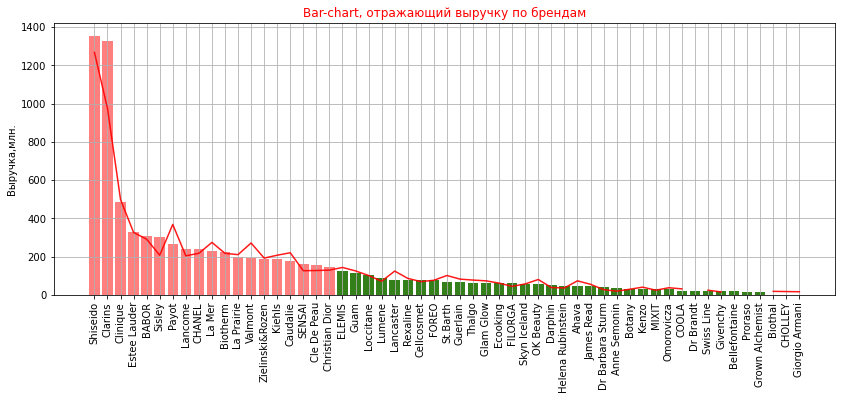

In [165]:
plt.figure(figsize=(14,5))
plt.plot(df_comp.brand,df_comp.revenue_15,color='red',alpha=0.9)
plt.bar(df_comp.brand,df_comp.revenue_14,color='red',alpha=0.5)
plt.bar(df_comp[df_comp['category']=='B'].brand,df_comp[df_comp['category']=='B'].revenue_14,color='g',alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('Bar-chart, отражающий выручку по брендам',color='red')
plt.ylabel('Выручка,млн.')
plt.grid()
plt.show()

- заметно, что общая тенденция распределения доли рынка по брендам сохраняется (барчарт и линейный график в целом повторяют динамику), но по некоторым брендам есть некоторое как увеличение, так и снижение объемов продаж 
- причем топовые лидеры рынка [Shiseido,Clarins] получили снижение объемов,тогда как некоторые "середнячки" увеличили объемы (такие как Payot,LaMer,Valmont,Kiehls,Caudalie)

#### вычислим относительное изменение выручки и маржи по брендам

In [136]:
df_comp['relative_change_rev'] = (df_comp.revenue_15/df_comp.revenue_14-1)*100
df_comp['relative_change_marga'] = (df_comp.marga_15/df_comp.marga_14-1)*100
df_rez = df_comp.sort_values(by='relative_change_rev', ascending=False).dropna() 
df_rez_sort_marga = df_rez.sort_values(by=['relative_change_marga','relative_change_rev'], ascending=False)
df_rez.head()

brand  revenue_14  marga_14   wrev_14  cumsum_14 category  revenue_15  \
37      Ahava        44.0      12.0  0.519910  95.651660        B        73.0   
23  Lancaster        80.0      14.0  0.945291  85.407066        B       124.0   
27   St.Barth        67.0      19.0  0.791681  88.916460        B       101.0   
45      COOLA        22.0      21.0  0.259955  98.747489        B        31.0   
12    Valmont       195.0      15.0  2.304147  67.328371        A       271.0   

    marga_15   wrev_15  relative_change_rev  relative_change_marga  
37       8.0  0.889160            65.909091             -33.333333  
23      10.0  1.510353            55.000000             -28.571429  
27      19.0  1.230207            50.746269               0.000000  
45      20.0  0.377588            40.909091              -4.761905  
12      16.0  3.300853            38.974359               6.666667

#####  Построим graph, отражающий изменение выручки (столбцы) и маржи (линия) в % по брендам по категориям 

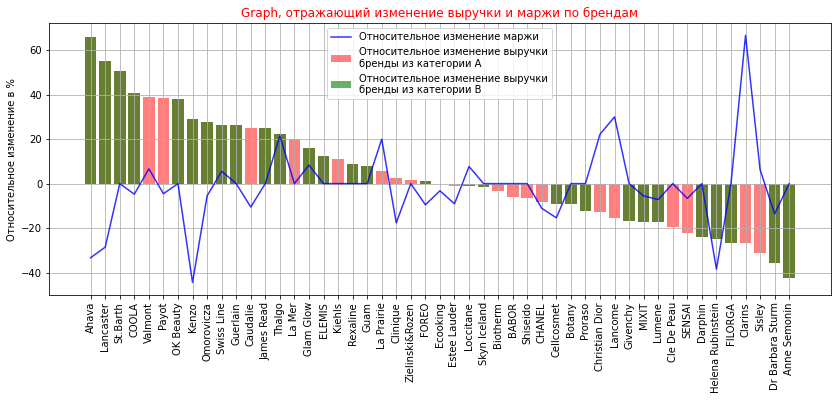

In [172]:
plt.figure(figsize=(14,5))
plt.plot(df_rez.brand,df_rez.relative_change_marga,color='b',alpha=0.8,label='Относительное изменение маржи')
plt.bar(df_rez.brand,df_rez.relative_change_rev,color='red',alpha=0.5,label='Относительное изменение выручки\nбренды из категории А')
plt.bar(df_rez[df_rez['category']=='B'].brand,df_rez[df_rez['category']=='B'].relative_change_rev,color='g',alpha=0.6,label='Относительное изменение выручки\nбренды из категории B')
plt.xticks(rotation='vertical')
plt.title('Graph, отражающий изменение выручки и маржи по брендам',color='red')
plt.ylabel('Относительное изменение в %')
plt.legend()
plt.grid()
plt.show()

- столбцы слева (больше нуля) отражают увеличение выручки. При этом маржа как уменьшалась (линии ниже 0), так и увеличивалась (линии выше 0)
- столбцы справа (меньше нуля) отражают уменьшение выручки на 15 неделе по сравнению с 14-ойю Маржа также ведет себя двояко

#### отсортируем данные по относительному изменению маржи и также отобразим на графике

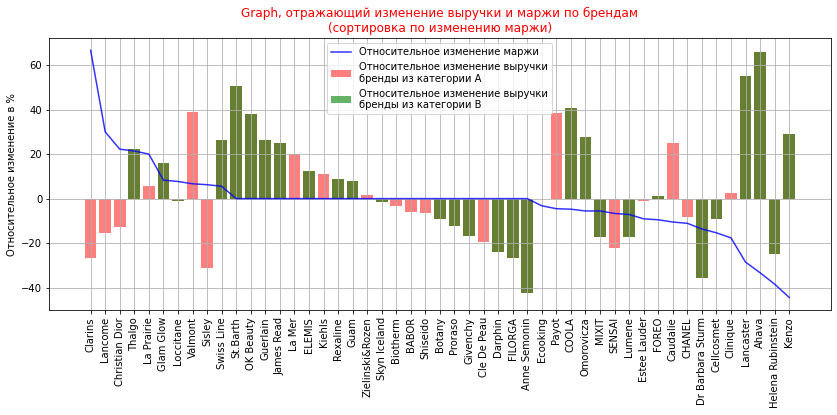

In [176]:
plt.figure(figsize=(14,5))
plt.plot(df_rez_sort_marga.brand,df_rez_sort_marga.relative_change_marga,color='b',alpha=0.8,label='Относительное изменение маржи')
plt.bar(df_rez_sort_marga.brand,df_rez_sort_marga.relative_change_rev,color='red',alpha=0.5,label='Относительное изменение выручки\nбренды из категории А')
plt.bar(df_rez_sort_marga[df_rez_sort_marga['category']=='B'].brand,df_rez_sort_marga[df_rez_sort_marga['category']=='B'].relative_change_rev,color='g',alpha=0.6,label='Относительное изменение выручки\nбренды из категории B')
plt.xticks(rotation='vertical')
plt.title('Graph, отражающий изменение выручки и маржи по брендам\n(сортировка по изменению маржи)',color='red')
plt.ylabel('Относительное изменение в %')
plt.legend()
plt.grid()
plt.show()

- на этом графике можем выделить три диапазона:

1) маржа увеличилась (синяя линия выше 0)

2) маржа не изменялась 

3) маржа уменьшилась (синяя линия выше 0)
- во всех трех диапазонах наблюдается как увеличение объема продаж, так и его уменьшение

###### разобъем сеты на три группы: 1-маржа не изменилась,2-маржа уведичилась,3-маржа уменьшилась

In [177]:
df_0 = df_rez_sort_marga[df_rez_sort_marga['relative_change_marga']==0].sort_values(by='relative_change_rev', ascending=False)
df_more0 = df_rez_sort_marga[df_rez_sort_marga['relative_change_marga']>0].sort_values(by='relative_change_rev', ascending=False)
df_less0 = df_rez_sort_marga[df_rez_sort_marga['relative_change_marga']<0].sort_values(by='relative_change_rev', ascending=False)

- по каждому сету построим график

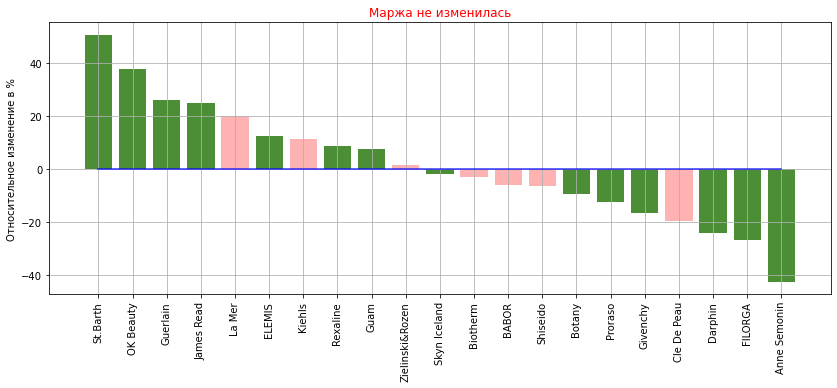

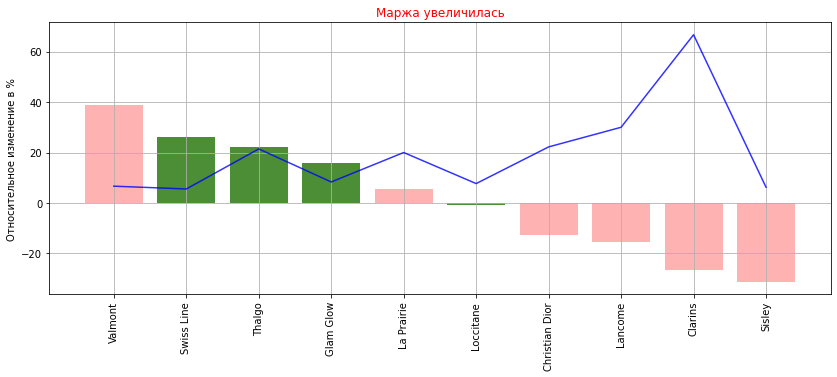

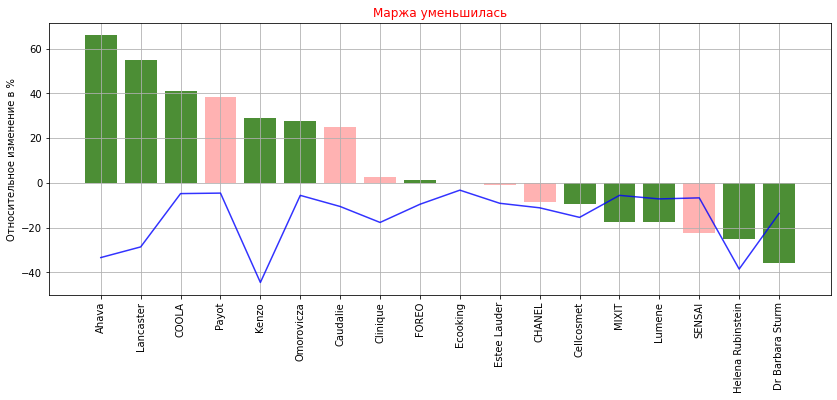

In [179]:
# Построим graph
plt.figure(figsize=(14,5))
plt.plot(df_0.brand,df_0.relative_change_marga,color='b',alpha=0.8)
plt.bar(df_0.brand,df_0.relative_change_rev,color='red',alpha=0.3)
plt.bar(df_0[df_0['category']=='B'].brand,df_0[df_0['category']=='B'].relative_change_rev,color='g',alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Маржа не изменилась',color='red')
plt.ylabel('Относительное изменение в %')
plt.grid()
plt.show()
# Построим graph
plt.figure(figsize=(14,5))
plt.plot(df_more0.brand,df_more0.relative_change_marga,color='b',alpha=0.8)
plt.bar(df_more0.brand,df_more0.relative_change_rev,color='red',alpha=0.3)
plt.bar(df_more0[df_more0['category']=='B'].brand,df_more0[df_more0['category']=='B'].relative_change_rev,color='g',alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Маржа увеличилась',color='red')
plt.ylabel('Относительное изменение в %')
plt.grid()
plt.show()
# Построим graph
plt.figure(figsize=(14,5))
plt.plot(df_less0.brand,df_less0.relative_change_marga,color='b',alpha=0.8)
plt.bar(df_less0.brand,df_less0.relative_change_rev,color='red',alpha=0.3)
plt.bar(df_less0[df_less0['category']=='B'].brand,df_less0[df_less0['category']=='B'].relative_change_rev,color='g',alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Маржа уменьшилась',color='red')
plt.ylabel('Относительное изменение в %')
plt.grid()
plt.show()

##### Сформируем списки брендов относительно изменения маржи/выручки, также учтем категории по объему продаж

In [202]:
print(f"Увеличение выручки без изменения маржи (кат.А):\n{list(df_0[(df_0.relative_change_rev>0)&(df_0.category=='A')]['brand'])}")
print(f"Увеличение выручки без изменения маржи (кат.В):\n{list(df_0[(df_0.relative_change_rev>0)&(df_0.category=='B')]['brand'])}\n")

print(f"Уменьшение выручки без изменения маржи (кат.А):\n{list(df_0[(df_0.relative_change_rev<0)&(df_0.category=='A')]['brand'])}")
print(f"Уменьшение выручки без изменения маржи (кат.B):\n{list(df_0[(df_0.relative_change_rev<0)&(df_0.category=='B')]['brand'])}\n")

print(f"Увеличение выручки при увеличении маржи (кат.А):\n{list(df_more0[(df_more0.relative_change_rev>0)&(df_more0.category=='A')]['brand'])}")
print(f"Увеличение выручки при увеличении маржи (кат.B):\n{list(df_more0[(df_more0.relative_change_rev>0)&(df_more0.category=='B')]['brand'])}\n")

print(f"Уменьшение выручки при увеличении маржи (кат.А):\n{list((df_more0[(df_more0.relative_change_rev<0)&(df_more0.category=='A')]['brand']))}")
print(f"Уменьшение выручки при увеличении маржи (кат.B):\n{list((df_more0[(df_more0.relative_change_rev<0)&(df_more0.category=='B')]['brand']))}\n")

print(f"Увеличение выручки при уменьшении маржи (кат.А):\n{list((df_less0[(df_less0.relative_change_rev>0)&(df_less0.category=='A')]['brand']))}")
print(f"Увеличение выручки при уменьшении маржи (кат.B):\n{list((df_less0[(df_less0.relative_change_rev>0)&(df_less0.category=='B')]['brand']))}\n")

print(f"Уменьшение выручки при уменьшении маржи (кат.А):\n{list((df_less0[(df_less0.relative_change_rev<0)&(df_less0.category=='A')]['brand']))}")
print(f"Уменьшение выручки при уменьшении маржи (кат.B):\n{list((df_less0[(df_less0.relative_change_rev<0)&(df_less0.category=='B')]['brand']))}")

Увеличение выручки без изменения маржи (кат.А):
['La Mer', 'Kiehls', 'Zielinski&Rozen']
Увеличение выручки без изменения маржи (кат.В):
['St.Barth', 'OK Beauty', 'Guerlain', 'James Read', 'ELEMIS', 'Rexaline', 'Guam']

Уменьшение выручки без изменения маржи (кат.А):
['Biotherm', 'BABOR', 'Shiseido', 'Cle De Peau']
Уменьшение выручки без изменения маржи (кат.B):
['Skyn Iceland', 'Botany', 'Proraso', 'Givenchy', 'Darphin', 'FILORGA', 'Anne Semonin']

Увеличение выручки при увеличении маржи (кат.А):
['Valmont', 'La Prairie']
Увеличение выручки при увеличении маржи (кат.B):
['Swiss Line', 'Thalgo', 'Glam Glow']

Уменьшение выручки при увеличении маржи (кат.А):
['Christian Dior', 'Lancome', 'Clarins', 'Sisley']
Уменьшение выручки при увеличении маржи (кат.B):
['Loccitane']

Увеличение выручки при уменьшении маржи (кат.А):
['Payot', 'Caudalie', 'Clinique']
Увеличение выручки при уменьшении маржи (кат.B):
['Ahava', 'Lancaster', 'COOLA', 'Kenzo', 'Omorovicza', 'FOREO']

Уменьшение выручки при 